In [446]:

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [447]:
dz= pd.read_csv('energydata_complete (1).csv')
dz

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89000,47.59667,19.20000,44.79000,19.79000,44.73000,19.00000,...,17.03333,45.53000,6.60000,733.50000,92.00000,7.00000,63.00000,5.30000,13.27543,13.27543
1,2016-01-11 17:10:00,60,30,19.89000,46.69333,19.20000,44.72250,19.79000,44.79000,19.00000,...,17.06667,45.56000,6.48333,733.60000,92.00000,6.66667,59.16667,5.20000,18.60619,18.60619
2,2016-01-11 17:20:00,50,30,19.89000,46.30000,19.20000,44.62667,19.79000,44.93333,18.92667,...,17.00000,45.50000,6.36667,733.70000,92.00000,6.33333,55.33333,5.10000,28.64267,28.64267
3,2016-01-11 17:30:00,50,40,19.89000,46.06667,19.20000,44.59000,19.79000,45.00000,18.89000,...,17.00000,45.40000,6.25000,733.80000,92.00000,6.00000,51.50000,5.00000,45.41039,45.41039
4,2016-01-11 17:40:00,60,40,19.89000,46.33333,19.20000,44.53000,19.79000,45.00000,18.89000,...,17.00000,45.40000,6.13333,733.90000,92.00000,5.66667,47.66667,4.90000,10.08410,10.08410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.56667,46.56000,25.89000,42.02571,27.20000,41.16333,24.70000,...,23.20000,46.79000,22.73333,755.20000,55.66667,3.33333,23.66667,13.33333,43.09681,43.09681
19731,2016-05-27 17:30:00,90,0,25.50000,46.50000,25.75400,42.08000,27.13333,41.22333,24.70000,...,23.20000,46.79000,22.60000,755.20000,56.00000,3.50000,24.50000,13.30000,49.28294,49.28294
19732,2016-05-27 17:40:00,270,10,25.50000,46.59667,25.62857,42.76857,27.05000,41.69000,24.70000,...,23.20000,46.79000,22.46667,755.20000,56.33333,3.66667,25.33333,13.26667,29.19912,29.19912
19733,2016-05-27 17:50:00,420,10,25.50000,46.99000,25.41400,43.03600,26.89000,41.29000,24.70000,...,23.20000,46.81750,22.33333,755.20000,56.66667,3.83333,26.16667,13.23333,6.32278,6.32278


In [448]:
dz.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,...,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000,19735.00000
mean,97.69496,3.80187,21.68657,40.25974,20.34122,40.42042,22.26761,39.24250,20.85533,39.02690,...,19.48583,41.55240,7.41166,755.52260,79.75042,4.03975,38.33083,3.76071,24.98803,24.98803
std,102.52489,7.93599,1.60607,3.97930,2.19297,4.06981,2.00611,3.25458,2.04288,4.34132,...,2.01471,4.15150,5.31741,7.39944,14.90109,2.45122,11.79472,4.19465,14.49663,14.49663
min,10.00000,0.00000,16.79000,27.02333,16.10000,20.46333,17.20000,28.76667,15.10000,27.66000,...,14.89000,29.16667,-5.00000,729.30000,24.00000,0.00000,1.00000,-6.60000,0.00532,0.00532
25%,50.00000,0.00000,20.76000,37.33333,18.79000,37.90000,20.79000,36.90000,19.53000,35.53000,...,18.00000,38.50000,3.66667,750.93333,70.33333,2.00000,29.00000,0.90000,12.49789,12.49789
50%,60.00000,0.00000,21.60000,39.65667,20.00000,40.50000,22.10000,38.53000,20.66667,38.40000,...,19.39000,40.90000,6.91667,756.10000,83.66667,3.66667,40.00000,3.43333,24.89765,24.89765
75%,100.00000,0.00000,22.60000,43.06667,21.50000,43.26000,23.29000,41.76000,22.10000,42.15667,...,20.60000,44.33810,10.40833,760.93333,91.66667,5.50000,40.00000,6.56667,37.58377,37.58377
max,1080.00000,70.00000,26.26000,63.36000,29.85667,56.02667,29.23600,50.16333,26.20000,51.09000,...,24.50000,53.32667,26.10000,772.30000,100.00000,14.00000,66.00000,15.50000,49.99653,49.99653


In [449]:
dz.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.00000,0.19728,0.05545,0.08603,0.12007,-0.06046,0.08506,0.03629,0.04028,0.01697,...,0.01001,-0.05146,0.09915,-0.03488,-0.15228,0.08712,0.00023,0.01535,-0.01114,-0.01114
lights,0.19728,1.00000,-0.02353,0.10697,-0.00562,0.05099,-0.09739,0.13116,-0.00886,0.11494,...,-0.15759,-0.00877,-0.07442,-0.01058,0.06854,0.06028,0.02004,-0.03632,0.00052,0.00052
T1,0.05545,-0.02353,1.00000,0.16401,0.83683,-0.00251,0.89240,-0.02855,0.87700,0.09786,...,0.84478,0.07176,0.68285,-0.15057,-0.34548,-0.08765,-0.07621,0.57131,-0.00620,-0.00620
RH_1,0.08603,0.10697,0.16401,1.00000,0.26984,0.79754,0.25323,0.84468,0.10618,0.88036,...,0.11526,0.76400,0.34077,-0.29396,0.27413,0.20493,-0.02106,0.63911,-0.00070,-0.00070
T2,0.12007,-0.00562,0.83683,0.26984,1.00000,-0.16561,0.73525,0.12150,0.76207,0.23156,...,0.67553,0.15735,0.79225,-0.13303,-0.50529,0.05250,-0.06972,0.58260,-0.01109,-0.01109
RH_2,-0.06046,0.05099,-0.00251,0.79754,-0.16561,1.00000,0.13732,0.67833,-0.04730,0.72144,...,0.05454,0.67647,0.03367,-0.25565,0.58491,0.06919,-0.00537,0.49915,0.00627,0.00627
T3,0.08506,-0.09739,0.89240,0.25323,0.73525,0.13732,1.00000,-0.01123,0.85278,0.12274,...,0.90132,0.13460,0.69942,-0.18997,-0.28172,-0.10078,-0.10231,0.64589,-0.00519,-0.00519
RH_3,0.03629,0.13116,-0.02855,0.84468,0.12150,0.67833,-0.01123,1.00000,-0.14046,0.89898,...,-0.19527,0.83354,0.11821,-0.23327,0.35619,0.26319,0.01704,0.41439,-0.00048,-0.00048
T4,0.04028,-0.00886,0.87700,0.10618,0.76207,-0.04730,0.85278,-0.14046,1.00000,-0.04865,...,0.88944,-0.02555,0.66348,-0.07529,-0.38860,-0.18575,-0.10477,0.51947,-0.00181,-0.00181
RH_4,0.01697,0.11494,0.09786,0.88036,0.23156,0.72144,0.12274,0.89898,-0.04865,1.00000,...,-0.04452,0.85659,0.29329,-0.25075,0.33681,0.30019,0.00264,0.61651,-0.00179,-0.00179


In [450]:
dz.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89000,47.59667,19.20000,44.79000,19.79000,44.73000,19.00000,...,17.03333,45.53000,6.60000,733.50000,92.00000,7.00000,63.00000,5.30000,13.27543,13.27543
1,2016-01-11 17:10:00,60,30,19.89000,46.69333,19.20000,44.72250,19.79000,44.79000,19.00000,...,17.06667,45.56000,6.48333,733.60000,92.00000,6.66667,59.16667,5.20000,18.60619,18.60619
2,2016-01-11 17:20:00,50,30,19.89000,46.30000,19.20000,44.62667,19.79000,44.93333,18.92667,...,17.00000,45.50000,6.36667,733.70000,92.00000,6.33333,55.33333,5.10000,28.64267,28.64267
3,2016-01-11 17:30:00,50,40,19.89000,46.06667,19.20000,44.59000,19.79000,45.00000,18.89000,...,17.00000,45.40000,6.25000,733.80000,92.00000,6.00000,51.50000,5.00000,45.41039,45.41039
4,2016-01-11 17:40:00,60,40,19.89000,46.33333,19.20000,44.53000,19.79000,45.00000,18.89000,...,17.00000,45.40000,6.13333,733.90000,92.00000,5.66667,47.66667,4.90000,10.08410,10.08410


In [451]:
dz=dz.drop(columns=['date', 'lights'])
dz

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89000,47.59667,19.20000,44.79000,19.79000,44.73000,19.00000,45.56667,17.16667,...,17.03333,45.53000,6.60000,733.50000,92.00000,7.00000,63.00000,5.30000,13.27543,13.27543
1,60,19.89000,46.69333,19.20000,44.72250,19.79000,44.79000,19.00000,45.99250,17.16667,...,17.06667,45.56000,6.48333,733.60000,92.00000,6.66667,59.16667,5.20000,18.60619,18.60619
2,50,19.89000,46.30000,19.20000,44.62667,19.79000,44.93333,18.92667,45.89000,17.16667,...,17.00000,45.50000,6.36667,733.70000,92.00000,6.33333,55.33333,5.10000,28.64267,28.64267
3,50,19.89000,46.06667,19.20000,44.59000,19.79000,45.00000,18.89000,45.72333,17.16667,...,17.00000,45.40000,6.25000,733.80000,92.00000,6.00000,51.50000,5.00000,45.41039,45.41039
4,60,19.89000,46.33333,19.20000,44.53000,19.79000,45.00000,18.89000,45.53000,17.20000,...,17.00000,45.40000,6.13333,733.90000,92.00000,5.66667,47.66667,4.90000,10.08410,10.08410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.56667,46.56000,25.89000,42.02571,27.20000,41.16333,24.70000,45.59000,23.20000,...,23.20000,46.79000,22.73333,755.20000,55.66667,3.33333,23.66667,13.33333,43.09681,43.09681
19731,90,25.50000,46.50000,25.75400,42.08000,27.13333,41.22333,24.70000,45.59000,23.23000,...,23.20000,46.79000,22.60000,755.20000,56.00000,3.50000,24.50000,13.30000,49.28294,49.28294
19732,270,25.50000,46.59667,25.62857,42.76857,27.05000,41.69000,24.70000,45.73000,23.23000,...,23.20000,46.79000,22.46667,755.20000,56.33333,3.66667,25.33333,13.26667,29.19912,29.19912
19733,420,25.50000,46.99000,25.41400,43.03600,26.89000,41.29000,24.70000,45.79000,23.20000,...,23.20000,46.81750,22.33333,755.20000,56.66667,3.83333,26.16667,13.23333,6.32278,6.32278


In [452]:
dz.shape

(19735, 27)

In [453]:
dz.isnull().any()

Appliances     False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

In [454]:
features_dz = dz.iloc[:, 1:27].values.reshape(-1,1)

print(features_dz)




[[19.89      ]
 [47.59666667]
 [19.2       ]
 ...
 [13.2       ]
 [34.11885059]
 [34.11885059]]


In [455]:
appliances_target= dz.iloc[:,0].values.reshape(-1,1)

print(appliances_target)

[[ 60]
 [ 60]
 [ 50]
 ...
 [270]
 [420]
 [430]]


In [456]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_dz = pd.DataFrame(scaler.fit_transform(dz), columns=dz.columns)
features_dz = normalised_dz.drop(columns=['Appliances'])
appliances_target = normalised_dz['Appliances']


In [457]:
X_train, X_test, y_train, y_test = train_test_split( features_dz, appliances_target, test_size=0.3, random_state=42)

In [458]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(X_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(X_test)


In [459]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [460]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [461]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


In [462]:



linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')




final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.45670,-0.41107,-0.00000
1,T_out,-0.32186,-0.26217,0.00000
2,T2,-0.23618,-0.20140,0.00000
3,T9,-0.18994,-0.18892,-0.00000
4,RH_8,-0.15760,-0.15683,-0.00011
5,RH_out,-0.07767,-0.05472,-0.04956
6,RH_7,-0.04461,-0.04598,-0.00000
7,RH_9,-0.03980,-0.04137,-0.00000
8,T5,-0.01566,-0.01985,-0.00000
9,T1,-0.00328,-0.01841,0.00000


In [463]:
ridge_weights_df

,Features,Ridge_Weight
0,RH_2,-0.41107
1,T_out,-0.26217
2,T2,-0.20140
3,T9,-0.18892
4,RH_8,-0.15683
5,RH_out,-0.05472
6,RH_7,-0.04598
7,RH_9,-0.04137
8,T5,-0.01985
9,T1,-0.01841


In [464]:
lasso_weights_df.max()

Features           rv2
Lasso_weight   0.01788
dtype: object

In [465]:

res = final_weights[final_weights != 0.0]
res

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.45670,-0.41107,nan
1,T_out,-0.32186,-0.26217,nan
2,T2,-0.23618,-0.20140,nan
3,T9,-0.18994,-0.18892,nan
4,RH_8,-0.15760,-0.15683,-0.00011
5,RH_out,-0.07767,-0.05472,-0.04956
6,RH_7,-0.04461,-0.04598,nan
7,RH_9,-0.03980,-0.04137,nan
8,T5,-0.01566,-0.01985,nan
9,T1,-0.00328,-0.01841,nan


In [466]:
print(linear_model.intercept_)

0.15290295882253052


In [467]:
print(linear_model.coef_)

[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [468]:
import statsmodels.api as sm
linear_model=sm.OLS( appliances_target,features_dz)
results=linear_model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              806.4
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        04:42:48   Log-Likelihood:                          19816.
No. Observations:               19735   AIC:                                 -3.958e+04
Df Residuals:                   19710   BIC:                                 -3.938e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [469]:
residual = y_test-predicted_values

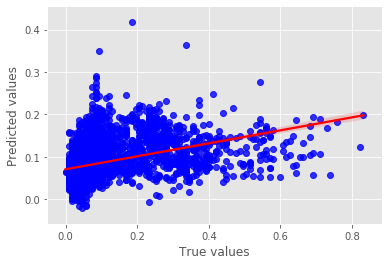

In [470]:
#Linearity
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#dg= pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
#regression plot
sns.regplot(x=y_test, y=predicted_values,color='b',line_kws={'color': 'red'})
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

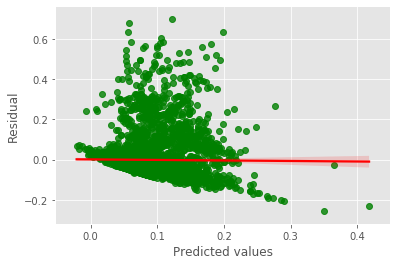

In [471]:
#Homoscedasticity
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
#dk = pd.DataFrame({'Residual': residual, 'Predicted': predicted_values})
#regression plot

sns.regplot(x=predicted_values, y=residual,color='g',line_kws={'color': 'red'})
plt.xlabel("Predicted values")
plt.ylabel("Residual")
plt.show()

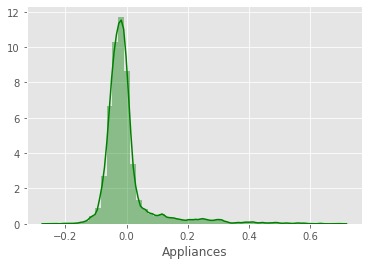

In [472]:
#Normality
sns.distplot(residual,color='g')

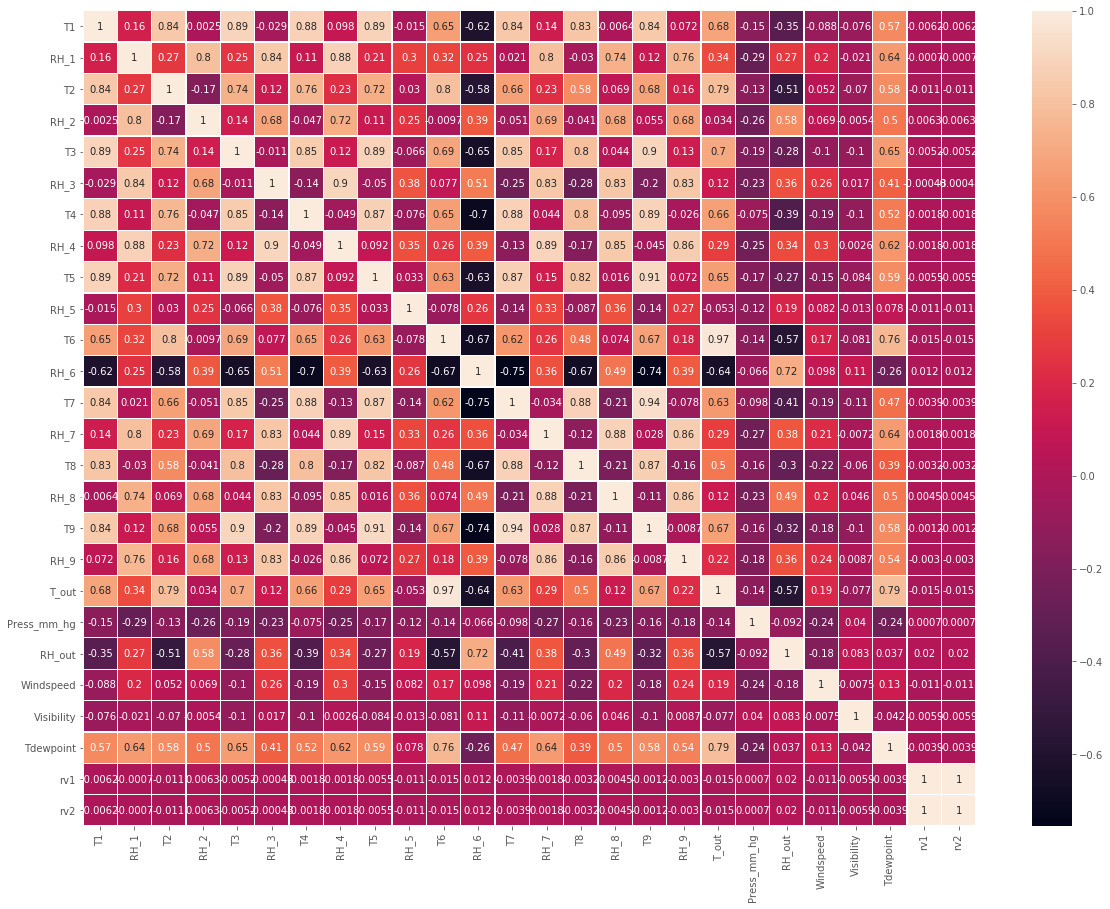

In [473]:
plt.subplots(figsize=(20,15))
dy= dz.drop(columns=['Appliances'])
sns.heatmap(dy.corr(),annot = True, linewidths=.2)

In [474]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [475]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [476]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)


45.348

In [477]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.088

In [478]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

dm=dz.drop(columns=['Appliances'])
for i in range(len(dm.columns[:-2])):
    v=vif(np.matrix(dm[:-2]),i)

    print("Variance inflation factor for {}:{}".format(dm.columns[i],round(v,2)))


Variance inflation factor for T1:3603.88
Variance inflation factor for RH_1:1639.05
Variance inflation factor for T2:2489.71
Variance inflation factor for RH_2:2163.72
Variance inflation factor for T3:1239.02
Variance inflation factor for RH_3:1568.22
Variance inflation factor for T4:932.66
Variance inflation factor for RH_4:1357.78
Variance inflation factor for T5:1187.48
Variance inflation factor for RH_5:45.08
Variance inflation factor for T6:88.92
Variance inflation factor for RH_6:40.33
Variance inflation factor for T7:1613.23
Variance inflation factor for RH_7:518.77
Variance inflation factor for T8:975.01
Variance inflation factor for RH_8:568.38
Variance inflation factor for T9:2516.67
Variance inflation factor for RH_9:637.29
Variance inflation factor for T_out:399.54
Variance inflation factor for Press_mm_hg:2084.45
Variance inflation factor for RH_out:1297.89
Variance inflation factor for Windspeed:5.25
Variance inflation factor for Visibility:12.03
Variance inflation factor

In [480]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [481]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [482]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


In [483]:

linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.45670,-0.41107,-0.00000
1,T_out,-0.32186,-0.26217,0.00000
2,T2,-0.23618,-0.20140,0.00000
3,T9,-0.18994,-0.18892,-0.00000
4,RH_8,-0.15760,-0.15683,-0.00011
5,RH_out,-0.07767,-0.05472,-0.04956
6,RH_7,-0.04461,-0.04598,-0.00000
7,RH_9,-0.03980,-0.04137,-0.00000
8,T5,-0.01566,-0.01985,-0.00000
9,T1,-0.00328,-0.01841,0.00000


In [495]:
final_weights.min()

Features               Press_mm_hg
Linear_Model_Weight       -0.45670
Ridge_Weight              -0.41107
Lasso_weight              -0.04956
dtype: object

In [496]:
final_weights.max()

Features                  rv2
Linear_Model_Weight   0.55355
Ridge_Weight          0.51953
Lasso_weight          0.01788
dtype: object

In [484]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.088

In [485]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_dz = pd.DataFrame(scaler.fit_transform(dz), columns=dz.columns)
x = normalised_dz[['T2']]
y = normalised_dz['T6']


In [486]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [487]:
linear_model= LinearRegression()


In [488]:
#fit the model to the training dataset
linear_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [489]:
predicted_values = linear_model.predict(X_test)

In [490]:
residual = y_test-predicted_values

In [491]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.893

0.643

In [492]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.082

In [493]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

66.116

In [494]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.106